In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ppdd = pd.read_csv("https://raw.githubusercontent.com/rm0anand/ppdd/main/post%20natal%20data.csv")

In [3]:
ppdd.drop('Timestamp', axis=1, inplace=True)

In [4]:
ppdd =ppdd.dropna(axis=0)
# To clean column name
ppdd.columns = ppdd.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
ppdd =ppdd.dropna(axis=0)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ppdd['irritable_towards_baby_and_partner'] = le.fit_transform(ppdd['irritable_towards_baby_and_partner'])
ppdd['trouble_sleeping_at_night'] = le.fit_transform(ppdd['trouble_sleeping_at_night'])
ppdd['problems_concentrating_or_making_decision'] = le.fit_transform(ppdd['problems_concentrating_or_making_decision'])
ppdd['overeating_or_loss_of_appetite'] = le.fit_transform(ppdd['overeating_or_loss_of_appetite'])
ppdd['feeling_anxious'] = le.fit_transform(ppdd['feeling_anxious'])
ppdd['problems_of_bonding_with_baby'] = le.fit_transform(ppdd['problems_of_bonding_with_baby'])
ppdd['suicide_attempt'] = le.fit_transform(ppdd['suicide_attempt'])
ppdd['feeling_of_guilt'] = le.fit_transform(ppdd['feeling_of_guilt'])
ppdd['feeling_sad_or_tearful'] = le.fit_transform(ppdd['feeling_sad_or_tearful'])
ppdd['age'] = le.fit_transform(ppdd['age'])

In [7]:
from sklearn.model_selection import train_test_split
y = ppdd.feeling_anxious

ppdd_features = ppdd[['problems_of_bonding_with_baby', 'problems_concentrating_or_making_decision', 'age', 'irritable_towards_baby_and_partner', 'suicide_attempt']]
X= ppdd_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 1115 to 1134
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   problems_of_bonding_with_baby              1192 non-null   int64
 1   problems_concentrating_or_making_decision  1192 non-null   int64
 2   age                                        1192 non-null   int64
 3   irritable_towards_baby_and_partner         1192 non-null   int64
 4   suicide_attempt                            1192 non-null   int64
dtypes: int64(5)
memory usage: 55.9 KB
None


In [51]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=60, max_depth=15, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=60, random_state=42)

In [52]:
random_forest.score(X_train, y_train)

0.9345637583892618

In [53]:
random_forest.score(X_test, y_test)

0.9297658862876255

In [56]:
# plot tree
from sklearn.tree import plot_tree
plt.figure(figsize=(80, 100))
plot_tree(random_forest.estimators_[0], feature_names=X_train.columns, filled=True, fontsize=12)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

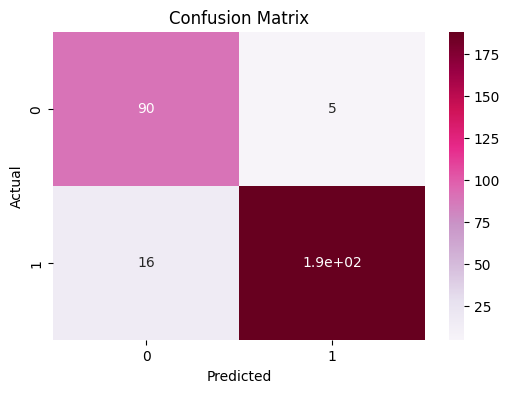

Random Forest Metrics:
Accuracy: 0.9297658862876255
Precision: 0.9740932642487047
Recall: 0.9215686274509803
F1 Score: 0.947103274559194


In [55]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# Make predictions on the test set
y_pred = random_forest.predict(X_test)
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,cmap='PuRd', cbar='True')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Random Forest Metrics:')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
recall= metrics.recall_score(y_test, y_pred)